In [14]:
import pandas as pd
import numpy as np
from utility_functions import report, scatterPlot
# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import PCA
from fma_metadata import utils
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
features = utils.load('/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/features.csv')

In [3]:
gen_labels = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/clean_datasets/labels/gr_top_lbl.csv')
gen_labels.set_index('track_id', inplace=True)
gen_labels.head()

,genre_top
track_id,
2,Hip-Hop
3,Hip-Hop
5,Hip-Hop
10,Pop
20,NaN


In [4]:
mfcc= features['mfcc']
mfcc.head()

statistics   kurtosis                                                    \
number             01        02        03        04        05        06   
track_id                                                                  
2            3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
3            4.296755  1.399977  0.112535 -0.211170  0.032953 -0.023489   
5            2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10           5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
20          11.880132  4.085320  0.002655  1.518562  0.181947  0.339014   

statistics                                          ...        std             \
number            07        08        09        10  ...         11         12   
track_id                                            ...                         
2          -0.259252  0.146735  0.410656 -0.162872  ...  10.059609   8.601942   
3           0.150404  0.046454  0.033484 -0.064596  ...   8.771966  10.026867   
5           0.090260  0.152119  0.261731 -0.608905  ...   8.863638   9.581952   
10         -0.529139  0.561974  0.281350 -0.150672  ...   8.289734   7.985110   
20          0.367611  0.069932 -0.016032  0.026012  ...   7.706648   6.498904   

statistics                                                              \
number            13        14        15        16        17        18   
track_id                                                                 
2           9.284250  9.245516  8.520863  8.560472  7.651871  7.246555   
3           6.978541  7.650417  9.600357  7.222888  8.398293  7.285423   
5           8.895723  8.141456  8.201844  7.780963  7.132692  7.539753   
10          7.075400  6.972649  7.071393  7.270959  7.051070  6.928591   
20          6.845514  6.934421  7.019398  6.983841  6.813648  7.520811   

statistics                      
number            19        20  
track_id                        
2           7.077188  7.391859  
3           7.417791  8.777440  
5           8.452527  7.334442  
10          6.430473  6.186294  
20          7.098001  7.032246  

[5 rows x 140 columns]

In [16]:
mfcc = features['mfcc'].merge(gen_labels, on='track_id')
mfcc.head()

,"(kurtosis, 01)","(kurtosis, 02)","(kurtosis, 03)","(kurtosis, 04)","(kurtosis, 05)","(kurtosis, 06)","(kurtosis, 07)","(kurtosis, 08)","(kurtosis, 09)","(kurtosis, 10)",...,"(std, 12)","(std, 13)","(std, 14)","(std, 15)","(std, 16)","(std, 17)","(std, 18)","(std, 19)","(std, 20)",genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,3.856789,1.541901,0.000816,0.330728,0.118731,-0.342687,-0.259252,0.146735,0.410656,-0.162872,...,8.601942,9.284250,9.245516,8.520863,8.560472,7.651871,7.246555,7.077188,7.391859,Hip-Hop
3,4.296755,1.399977,0.112535,-0.211170,0.032953,-0.023489,0.150404,0.046454,0.033484,-0.064596,...,10.026867,6.978541,7.650417,9.600357,7.222888,8.398293,7.285423,7.417791,8.777440,Hip-Hop
5,2.624517,2.415293,0.440233,-0.782131,-0.771069,-0.724216,0.090260,0.152119,0.261731,-0.608905,...,9.581952,8.895723,8.141456,8.201844,7.780963,7.132692,7.539753,8.452527,7.334442,Hip-Hop
10,5.076893,1.161854,2.095651,1.372743,-0.203574,-0.345354,-0.529139,0.561974,0.281350,-0.150672,...,7.985110,7.075400,6.972649,7.071393,7.270959,7.051070,6.928591,6.430473,6.186294,Pop
20,11.880132,4.085320,0.002655,1.518562,0.181947,0.339014,0.367611,0.069932,-0.016032,0.026012,...,6.498904,6.845514,6.934421,7.019398,6.983841,6.813648,7.520811,7.098001,7.032246,NaN


### Preprocessing - removing NaN values

In [80]:
mfcc.isnull().sum()

(kurtosis, 01)        0
(kurtosis, 02)        0
(kurtosis, 03)        0
(kurtosis, 04)        0
(kurtosis, 05)        0
                  ...  
(std, 17)             0
(std, 18)             0
(std, 19)             0
(std, 20)             0
genre_top         56976
Length: 141, dtype: int64

In [17]:
mfcc.dropna(axis=0, inplace=True)

In [82]:
mfcc.isnull().sum()

(kurtosis, 01)    0
(kurtosis, 02)    0
(kurtosis, 03)    0
(kurtosis, 04)    0
(kurtosis, 05)    0
                 ..
(std, 17)         0
(std, 18)         0
(std, 19)         0
(std, 20)         0
genre_top         0
Length: 141, dtype: int64

In [83]:
mfcc.shape

(49598, 141)

In [18]:
mfcc.genre_top.value_counts()
# selecting a subset of genres to predict
genres =['Rock' ,'Electronic','Hip-Hop','Pop','Classical','Jazz']
mfcc = mfcc[mfcc['genre_top'].isin(genres)]
print(mfcc.shape)
mfcc.head()

(31239, 141)


,"(kurtosis, 01)","(kurtosis, 02)","(kurtosis, 03)","(kurtosis, 04)","(kurtosis, 05)","(kurtosis, 06)","(kurtosis, 07)","(kurtosis, 08)","(kurtosis, 09)","(kurtosis, 10)",...,"(std, 12)","(std, 13)","(std, 14)","(std, 15)","(std, 16)","(std, 17)","(std, 18)","(std, 19)","(std, 20)",genre_top
track_id,,,,,,,,,,,,,,,,,,,,,
2,3.856789,1.541901,0.000816,0.330728,0.118731,-0.342687,-0.259252,0.146735,0.410656,-0.162872,...,8.601942,9.284250,9.245516,8.520863,8.560472,7.651871,7.246555,7.077188,7.391859,Hip-Hop
3,4.296755,1.399977,0.112535,-0.211170,0.032953,-0.023489,0.150404,0.046454,0.033484,-0.064596,...,10.026867,6.978541,7.650417,9.600357,7.222888,8.398293,7.285423,7.417791,8.777440,Hip-Hop
5,2.624517,2.415293,0.440233,-0.782131,-0.771069,-0.724216,0.090260,0.152119,0.261731,-0.608905,...,9.581952,8.895723,8.141456,8.201844,7.780963,7.132692,7.539753,8.452527,7.334442,Hip-Hop
10,5.076893,1.161854,2.095651,1.372743,-0.203574,-0.345354,-0.529139,0.561974,0.281350,-0.150672,...,7.985110,7.075400,6.972649,7.071393,7.270959,7.051070,6.928591,6.430473,6.186294,Pop
134,1.559808,0.840775,-0.171289,-0.265671,-0.279361,0.190866,-0.192000,0.422766,0.044087,-0.003510,...,9.696905,8.477474,7.413949,7.518894,6.755280,6.344675,6.761541,7.134986,6.803034,Hip-Hop


In [85]:
mfcc.genre_top.value_counts()

Rock          14182
Electronic     9372
Hip-Hop        3552
Pop            2332
Classical      1230
Jazz            571
Name: genre_top, dtype: int64

In [19]:
# label encoding
# encoding labels
le = preprocessing.LabelEncoder()
mfcc['genre_top'] = le.fit_transform(mfcc['genre_top'])

In [9]:
print('Legend:\n0: Classical\n1: Electronic\n2: Experimental\n3: Hip-Hop\n4: Instrumental\n5: International\n6: Jazz\n7: Pop\n8: Rock')
mfcc.genre_top.value_counts()

Legend:
0: Classical
1: Electronic
2: Experimental
3: Hip-Hop
4: Instrumental
5: International
6: Jazz
7: Pop
8: Rock


5    14182
1     9372
2     3552
4     2332
0     1230
3      571
Name: genre_top, dtype: int64

In [20]:
# detach target col
labels = mfcc['genre_top']
mfcc.drop('genre_top', axis=1, inplace=True)

In [21]:
# shuffle and split into development set and internal test set
X_develop, X_test, y_develop, y_test = train_test_split(
mfcc, labels, test_size=0.30, random_state=42)

In [90]:
# check partitions
print(f"___Legend___\n0: Classical\n1: Electronic\n2: Experimental\n3: Hip-Hop\n4: Instrumental\n5: International\n6: Jazz\n7: Pop\n8: Rock\n\nDevelopment set:\
\n{y_develop.value_counts()}\n\nInternal Test:\n{y_test.value_counts()}")

___Legend___
0: Classical
1: Electronic
2: Experimental
3: Hip-Hop
4: Instrumental
5: International
6: Jazz
7: Pop
8: Rock

Development set:
5    9939
1    6592
2    2456
4    1628
0     849
3     403
Name: genre_top, dtype: int64

Internal Test:
5    4243
1    2780
2    1096
4     704
0     381
3     168
Name: genre_top, dtype: int64


In [12]:
# normalize datas
scaler = StandardScaler(copy=False)
X_develop = scaler.fit_transform(X_develop)
X_test = scaler.transform(X_test)

# PCA Multiclass

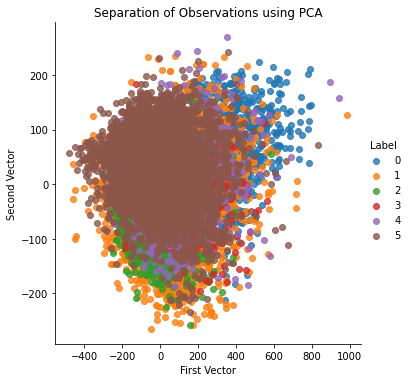

In [27]:
pca = PCA(n_components=2)

#pca.fit(X_develop)
X_pca = pca.fit_transform(X_develop)
X_pca = pd.DataFrame(data=X_pca, index=X_develop.index)
X_testPCA = pca.fit_transform(X_test)

scatterPlot(X_pca, y_develop, "PCA")


